# Proyek Analisis Data: Bike Sharing Dataset

 **Nama:** Kikan Anindya Prameswari

#### Apa itu Analisis Data?
Analisis data adalah tentang mempelajari data yang dipunyai agar mendapatkan insight atau informasi penting. Hasil dari analisis ini bisa dipakai untuk bantu mengambil keputusan yang lebih tepat, berdasarkan data nyata, bukan cuma tebakan.

#### Perbedaan Descriptive Analysis dan EDA
- **Descriptive Analysis**: hanya meringkas data, misal menghitung rata-rata, median, jumlah, atau nilai maksimum/minimum.  
- **Exploratory Data Analysis (EDA)**: lebih mengarah kepada eksplorasi. Mencari pola, tren, hubungan antar variabel, atau hal-hal yang aneh/unik di data.

#### Mengapa Data Cleaning & Wrangling Penting?
Sebelum mulai analisis serius, data harus bersih. Artinya diharuskan cek missing value, duplikasi, atau kesalahan input. Kalau datanya kotor, hasil analisis bisa salah atau menyesatkan.

#### Peran Visualisasi
Kadang angka-angka sulit dimengerti. Dengan visualisasi, pola dan insight dari data bisa terlihat jelas, lebih mudah dipahami, dan bisa langsung dijelasin ke orang lain.

#### Machine Learning
Menggunakan machine learning untuk prediksi atau mengelompokkan data. Misal, untuk memprediksi jumlah peminjaman sepeda berdasarkan cuaca. Dengan tujuan sebatas membantu insight, bukan fokus ke optimasi model.


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bulan atau musim mana yang memiliki jumlah peminjaman sepeda tertinggi?
- Pertanyaan 2: Faktor cuaca apa yang paling mempengaruhi jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Data Wrangling

### Gathering Data

In [20]:
df = pd.read_csv('dayy.csv')
df['dteday'] = pd.to_datetime(df['dteday'])

df.head()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Dataset memiliki 16 kolom termasuk tanggal, cuaca, dan jumlah peminjaman.
- Semua data terlihat lengkap.

### Assessing Data

In [ ]:
print(df.isnull().sum())

print("Jumlah duplikasi:", df.duplicated().sum())

df.describe()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi: 0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Tidak ada missing value atau duplikasi.
- Variabel numeric memiliki range logis.

### Cleaning Data

In [ ]:
df_clean = df.drop(columns=['instant','casual','registered'])

df_clean['dteday'] = pd.to_datetime(df_clean['dteday'])

df_clean.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


**Insight:**
- Kolom instant, casual, dan registered dihapus karena tidak relevan untuk analisis jumlah peminjaman total (cnt).
- Data siap untuk EDA.
- Target variable adalah cnt (total peminjaman).

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
df_clean.describe().T


,count,mean,min,25%,50%,75%,max,std
dteday,731,2012-01-01 00:00:00,2011-01-01 00:00:00,2011-07-02 12:00:00,2012-01-01 00:00:00,2012-07-01 12:00:00,2012-12-31 00:00:00,NaN
season,731.0,2.49658,1.0,2.0,3.0,3.0,4.0,1.110807
yr,731.0,0.500684,0.0,0.0,1.0,1.0,1.0,0.500342
mnth,731.0,6.519836,1.0,4.0,7.0,10.0,12.0,3.451913
holiday,731.0,0.028728,0.0,0.0,0.0,0.0,1.0,0.167155
weekday,731.0,2.997264,0.0,1.0,3.0,5.0,6.0,2.004787
workingday,731.0,0.683995,0.0,0.0,1.0,1.0,1.0,0.465233
weathersit,731.0,1.395349,1.0,1.0,1.0,2.0,3.0,0.544894
temp,731.0,0.495385,0.05913,0.337083,0.498333,0.655417,0.861667,0.183051
atemp,731.0,0.474354,0.07907,0.337842,0.486733,0.608602,0.840896,0.162961


**Insight:**
- Jumlah peminjaman (cnt) rata-rata sekitar 4504 per hari, dengan standar deviasi 1937 di mana ini menandakan variasi cukup besar dari hari ke hari.
- Suhu (temp & atemp) dan kelembapan (hum) berada di range logis, siap dianalisis untuk tren vs jumlah peminjaman.

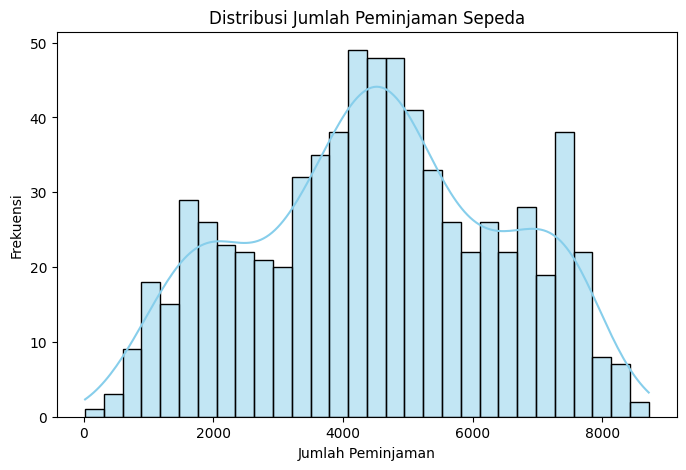

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['cnt'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Jumlah Peminjaman Sepeda")
plt.xlabel("Jumlah Peminjaman")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- Sebagian besar hari memiliki peminjaman antara 2000–7000 sepeda.
- Terdapat beberapa outlier tinggi di hari sibuk.

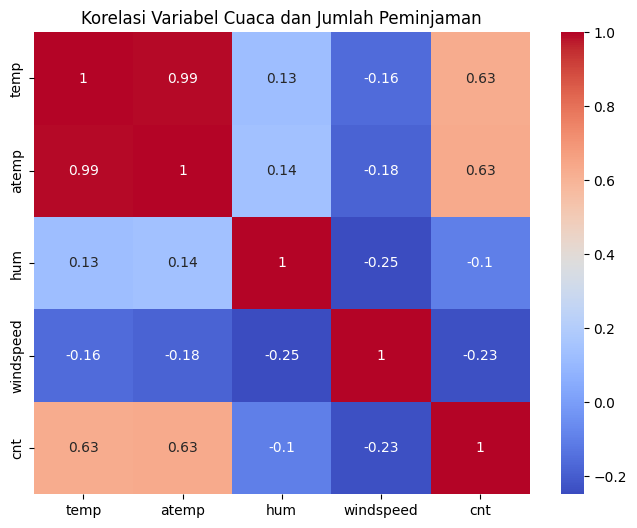

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[['temp','atemp','hum','windspeed','cnt']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Variabel Cuaca dan Jumlah Peminjaman")
plt.show()


**Insight:**
- Suhu (temp & atemp) berpengaruh positif terhadap jumlah peminjaman.
- Kelembapan sedikit negatif, windspeed hampir tidak berpengaruh.

## Visualization & Explanatory Analysis

### Pertanyaan 1: : Musim atau Bulan dengan Peminjaman Tertinggi

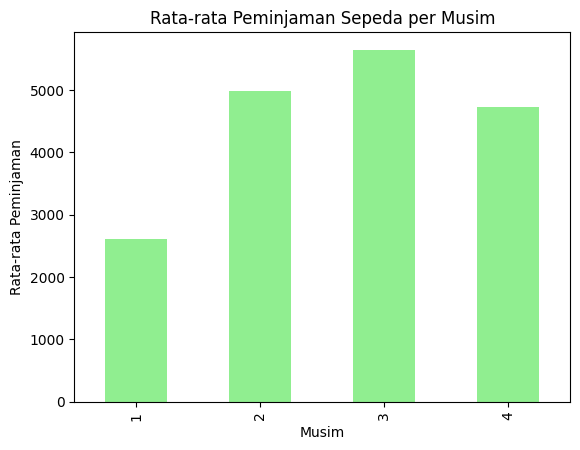

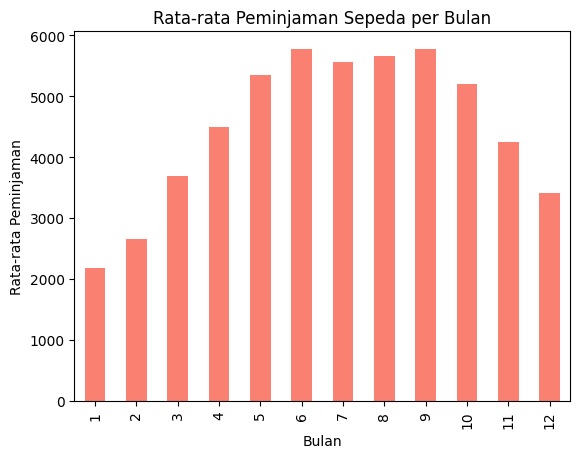

In [ ]:
season_avg = df_clean.groupby('season')['cnt'].mean()
season_avg.plot(kind='bar', title="Rata-rata Peminjaman Sepeda per Musim", color='lightgreen')
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman")
plt.show()

month_avg = df_clean.groupby('mnth')['cnt'].mean()
month_avg.plot(kind='bar', title="Rata-rata Peminjaman Sepeda per Bulan", color='salmon')
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Peminjaman")
plt.show()


**Insight:**
- Musim 3 memiliki rata-rata peminjaman tertinggi dibanding musim lainnya.
- Bulan 9 memiliki jumlah peminjaman tertinggi sepanjang tahun.

### Pertanyaan 2: Faktor Cuaca yang Paling Memengaruhi Peminjaman

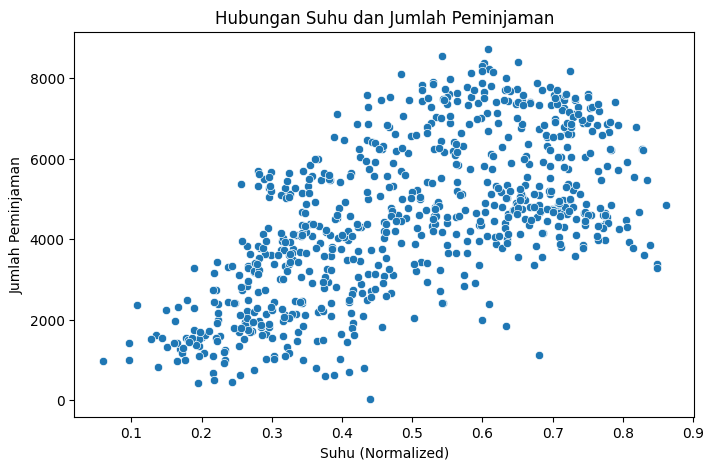

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='temp', y='cnt', data=df_clean)
plt.title("Hubungan Suhu dan Jumlah Peminjaman")
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Peminjaman")
plt.show()


**Insight:**
- Suhu (temp & atemp): korelasi positif kuat (~0.63) berarti semakin tinggi suhu, jumlah peminjaman meningkat. Suhu merupakan faktor cuaca paling berpengaruh.
- Kelembapan (hum): korelasi negatif kecil (~-0.10) berarti kelembapan sedikit menurunkan peminjaman, pengaruhnya minor.
- Kecepatan angin (windspeed): korelasi negatif sedang (~-0.23) berarti angin cenderung menurunkan jumlah peminjaman, pengaruhnya lebih kecil dibanding suhu.

In [ ]:
corr = df_clean[['temp','atemp','hum','windspeed','cnt']].corr()
print(corr)


               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.126963  -0.157944  0.627494
atemp      0.991702  1.000000  0.139988  -0.183643  0.631066
hum        0.126963  0.139988  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.183643 -0.248489   1.000000 -0.234545
cnt        0.627494  0.631066 -0.100659  -0.234545  1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_clean[['temp']]
y = df_clean['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Koefisien regresi (slope):", model.coef_[0])
print("Intercept:", model.intercept_)


Mean Squared Error: 2391051.8856316973
Koefisien regresi (slope): 6575.393257346771
Intercept: 1272.1573369376388


**Insight:**
- Setiap kenaikan suhu normalized 1 unit, jumlah peminjaman naik sekitar 6575 sepeda.
- Jikalau suhunya 0, prediksi jumlah peminjaman sekitar 1272 sepeda.
- Angka MSE yang cukup besar (2.391.051) menunjukkan kalau peminjaman harian bervariasi, jadi prediksi model nggak selalu pas.

## Kesimpulan

### Kesimpulan Nomor 1: Bulan/Musim dengan Peminjaman Tertinggi
- Musim 3 memiliki rata-rata peminjaman tertinggi dibanding musim lain.
- Bulan 9 memiliki jumlah peminjaman tertinggi sepanjang tahun.

### Kesimpulan Nomor 2: Faktor Cuaca yang Paling Mempengaruhi Peminjaman
- Suhu (temp & atemp) berpengaruh positif paling kuat terhadap jumlah peminjaman.
- Kelembapan (hum) sedikit menurunkan peminjaman.
- Angin (windspeed) menurunkan peminjaman.